In [1]:
import UsefulFunctions as uf
import pandas as pd
import pickle

### Required User Defined Inputs

In [2]:
#list input files
foldername_in_SiPMData="Aug222023SourceUCRStrip4V_2"

#inputfiles = ["../SiPMData/Apr26FNAL5V/1.txt"]
inputfiles = ["../SiPMData/%s/1.txt"%(foldername_in_SiPMData)]

print (inputfiles)

#inputfiles = ["1.txt"]

#inputfiles = ["2.txt"]

#inputfiles = ["../../Scintillator-Scanner/Convert2Txt/LargeData/1-2.txt"]
#numinput = 242
#for i in range(numinput):
#    inputfiles.append(f"../../Scintillator-Scanner/Convert2Txt/LargeData/1-{i+1}002.txt")
    #print(inputfiles,'\n')

#choose which stats to calculate
stats = [True,                         #chi^2
         True,True,True,True,        #amplitude & time (raw, base, smooth, fit)
         False]                        #CDF time -- not yet implemented

#name your output (pkl) file
#note: all input files are zipped into one output
outputname = "%s"%(foldername_in_SiPMData)
#outputname = 'Aug172023VoltageSweep2V_5V_2'
#print(inputfiles)

['../SiPMData/Aug222023SourceUCRStrip4V_2/1.txt']


### Optional User Defined Inputs

In [3]:
###    Optional parameters (and the default values):

#rmscut = 1.5
residualcut = 1000        #Default: 5 -- tolerance of the residual cut -- data with residuals above this value are removed via smoothing
channels = [1,2,3,4]        #Default: [1,2,3,4] -- choose which channels to analyze; must be a list!
#eventstart=1
verbose=True        #Default: False -- Set to True to see a few of the waveforms and the calculated values 
#show_residual=False        #Default: False -- Shows the residuals along with the waveforms when verbose=True
#vieweventstart=1        #Default: 1 -- The event number where events start being displayed when verbose=True
#viewevents=10        #Default: 10 -- The number of events displayed when verbose=True

#    ***ONLY NEEDED IF USING get_time_fit OR get_amplitude_fit*** 
#    initial parameters for waveform fit -- if fit does not converge, set verbose=True and try to determine what the typical start/end times are;
#    The fit is very sensitive to the initial start/end parameters 

start = 65
end = start+25
p0=[(2.97, 49.8, 6.38, 67.7, 2400997.68, -1990464.645),       #ch1 initial parameters
    (2.97, 49.8, 6.38, 67.7, 2400997.68, -1990464.645),       #ch2 initial parameters
    (0,start,1,end,-100,100),        #ch3 initial parameters
    (0,start,1,end,-100,100)]        #ch4 initial parameters

#Use when using Sr-90 VVVVVVV
#start = 65
#end = start+25

#p0=[(2.97, 49.8, 6.38, 67.7, 2400997.68, -1990464.645),       #ch1 initial parameters
#    (0,start,1,end,-100,100),       #ch2 initial parameters
#    (0,start,1,end,-100,100),        #ch3 initial parameters
#    (0,start,1,end,-100,100)]        #ch4 initial parameters


### Get Dataframe!

File: ../SiPMData/Aug222023SourceUCRStrip4V_2/1.txt
Event Number 5
Channel 2 RMS: 0.01
fit params: 0.01, 0.0, 0.00, 0.0, 1.00, 0.000


UnboundLocalError: local variable 'smoothvoltage' referenced before assignment

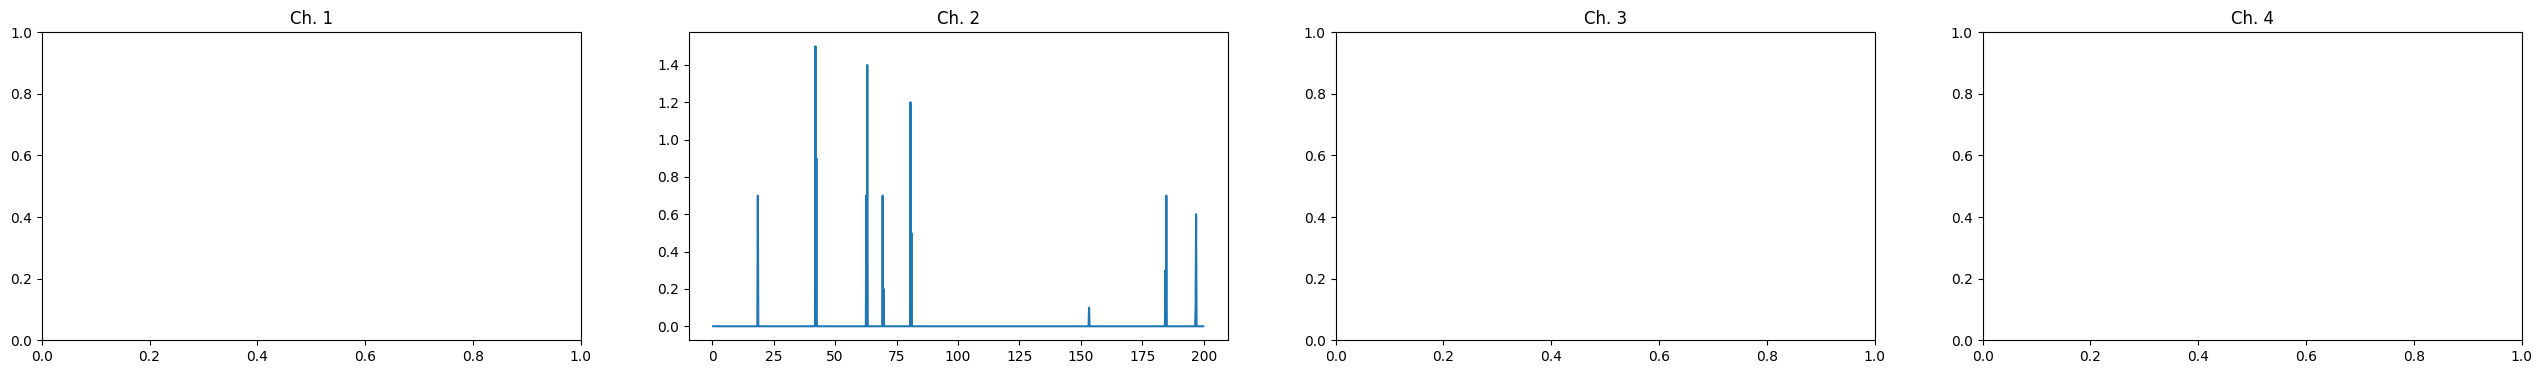

In [6]:
#print(inputfiles)
dataframe = uf.get_dataframe(inputfiles,stats,verbose=True,residualcut = 1000,channels = [2],p0=p0,eventstart=5,viewevents=10)#add ",maxevent=10" to your parameters to only convert that many events
pd.to_pickle(dataframe, f"{outputname}.pkl")

In [8]:
#read the dataframe from the output pkl file
with open(f'{outputname}.pkl', 'rb') as f:
    fout = pickle.load(f)
fout

,ch2_chisq,ch2_P2P_raw,ch2_time_raw,ch2_P2P_base,ch2_time_base,ch2_P2P_smooth,ch2_time_smooth,ch2_P2P_fit,ch2_time_fit
0,1.186325,12.4,96.0938,6.984000,98.6328,6.263867,97.2656,-0.317352,26.362165
1,1.956248,24.2,93.3594,9.989333,97.6562,8.492533,97.4609,4.227329,95.561930
2,1.277078,29.7,97.4609,25.738000,97.4609,24.356400,97.4609,11.304097,155.056181
3,1.556062,18.3,98.2422,13.577333,98.4375,12.993067,98.4375,5.985931,33.682627
4,1.343493,11.1,97.4609,7.962000,97.8516,7.279867,97.8516,1.972294,84.375698
...,...,...,...,...,...,...,...,...,...
19994,2.064278,17.7,98.6328,13.542000,98.8281,12.828800,98.8281,7.090976,97.604454
19995,2.130011,12.2,95.7031,8.026000,96.0938,7.489200,96.0938,4.650765,93.181414
19996,0.983319,20.1,97.0703,15.863333,97.4609,14.366667,97.2656,8.386133,96.608135
19997,4.207952,23.5,87.5000,9.054667,97.6562,7.920667,97.2656,3.458450,95.396100


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

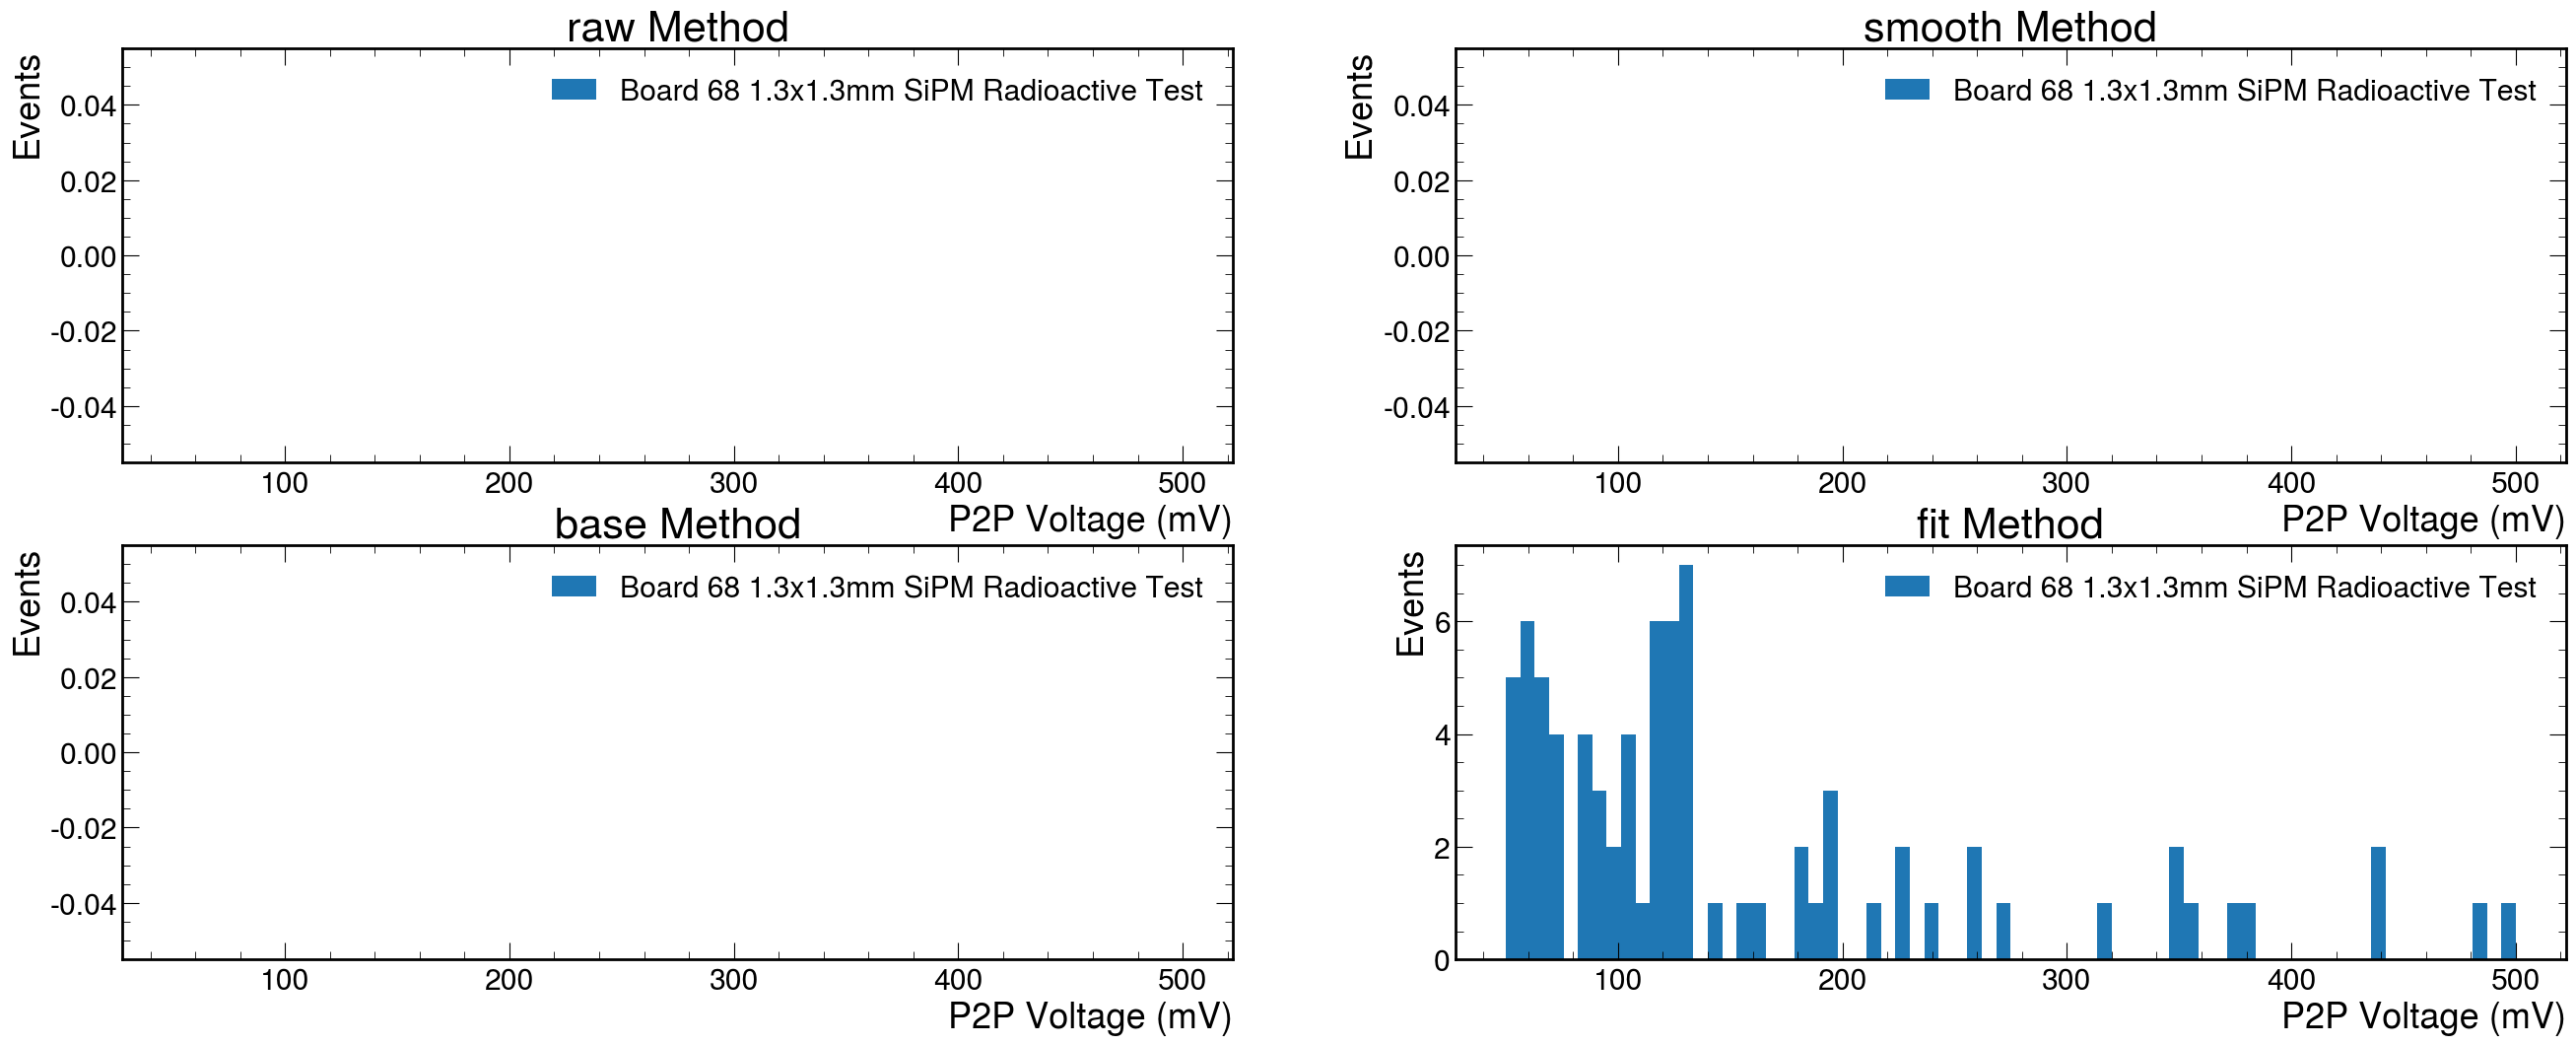

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

hep.style.use("CMS")
methods = ["raw","base","smooth","fit"]

fig, ax = plt.subplots(2,2,figsize=(32,12))
for i in range(4):
    plt.sca(ax[i%2,i//2])
    #change when using source VVV
    column = f"ch2_P2P_{methods[i]}"
    hist = plt.hist(fout.eval(f"{column}"),bins=int(np.sqrt(len(fout))/2),label="Board 68 1.3x1.3mm SiPM Radioactive Test",range=(50,500))
    plt.legend()
    plt.xlabel("P2P Voltage (mV)")
    plt.ylabel("Events")
    plt.title(f"{methods[i]} Method")
plt.plot

In [10]:
#print(min(fout.ch2_P2P_smooth))
#len(fout.query('ch2_P2P_smooth>24')['ch2_P2P_smooth'])


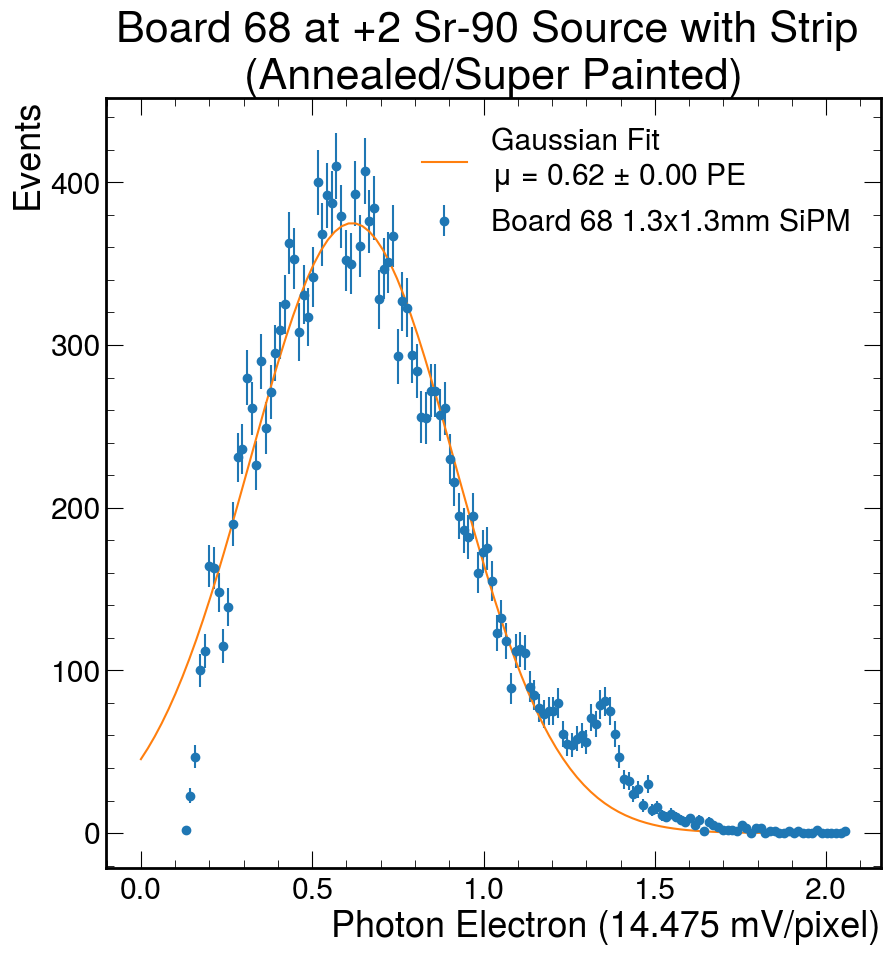

In [14]:
from scipy.optimize import curve_fit
import numpy as np

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


plt.figure(figsize=(6,10))
PE = 14.475 #Pixel Calibration mV/Pixel
#Change when using source VVVVV
hist = plt.hist(fout.query("ch2_P2P_smooth>0").eval(f"ch2_P2P_smooth")/PE,bins=int(np.sqrt(len(fout))))
bin_centers = (hist[1][1:]+hist[1][:-1])/2
plt.close()

plt.errorbar(bin_centers,hist[0],np.sqrt(hist[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff, covar = curve_fit(gauss, bin_centers, hist[0], p0=(50,300/PE,100/PE),maxfev=80000)
#plt.plot(np.linspace(0,500/PE,100),gauss(np.linspace(0,500/PE,100),*coeff),label=f"Gaussian Fit\n$\mu$ = {coeff[1]:.2f} $\pm$ {np.sqrt(covar[1][1]):.2f} PE")
plt.plot(np.linspace(0,2,100),gauss(np.linspace(0,2,100),*coeff),label=f"Gaussian Fit\n$\mu$ = {coeff[1]:.2f} $\pm$ {np.sqrt(covar[1][1]):.2f} PE")
plt.xlabel(f"Photon Electron ({PE} mV/pixel)")
plt.ylabel("Events")
plt.legend()
plt.title("Board 68 at +2 Sr-90 Source with Strip \n(Annealed/Super Painted)")
plt.show()



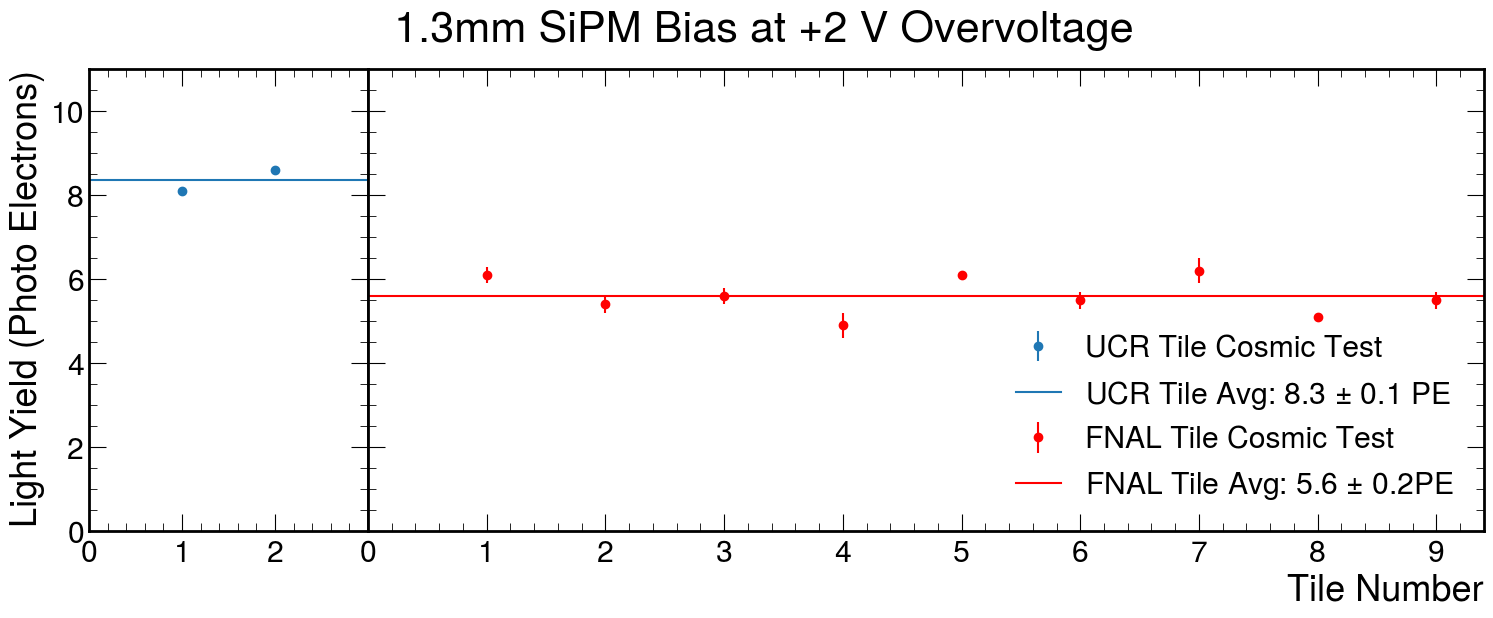

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

UCR_source = [10.4, 9.8]
UCR_source_e = [0.3, 0.2]
UCR_cosmic = [8.1, 8.6]
UCR_cosmic_e = [0.1, 0.1]

FNAL_source = [8.9, 9.1, 8.8, 5.7, 6.8, 6.3, 7.2, 6.0, 6.4]
FNAL_source_e = [0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
FNAL_cosmic = [6.1, 5.4, 5.6, 4.9, 6.1, 5.5, 6.2, 5.1, 5.5]
FNAL_cosmic_e = [0.2, 0.2, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2]

fig = plt.figure(figsize=(18,6))
fig.suptitle("1.3mm SiPM Bias at +2 V Overvoltage")
gs = gridspec.GridSpec(1, 2, width_ratios=[1, int(len(FNAL_cosmic)/len(UCR_cosmic))]) 
ax = plt.subplot(gs[0])

ax0 = plt.subplot(gs[0])
#ax0.errorbar(np.arange(1,len(UCR_source)+1,1),UCR_source,UCR_source_e,fmt='o',label="UCR Tile Source Test")
pl1 = ax0.errorbar(np.arange(1,len(UCR_cosmic)+1,1),UCR_cosmic,UCR_cosmic_e,fmt='o')
pl2 = ax0.axhline(np.mean(UCR_cosmic))
plt.ylabel("Light Yield (Photo Electrons)")
plt.ylim(0,11)
plt.xlim(0,len(UCR_source)+1)
plt.xticks(np.arange(0, len(UCR_cosmic)+1, 1.0))

ax1 = plt.subplot(gs[1],  sharey = ax0)
ax1.yaxis.set_tick_params(labelleft=False)
#ax1.errorbar(np.arange(1,len(FNAL_source)+1,1),FNAL_source,FNAL_source_e,fmt='o',label="FNAL Tile Source Test")
pl3 = ax1.errorbar(np.arange(1,len(FNAL_cosmic)+1,1),FNAL_cosmic,FNAL_cosmic_e,fmt='o',color='r')
pl4 = ax1.axhline(np.mean(FNAL_cosmic),color='r')
ax1.set_xticks(np.arange(0, len(FNAL_cosmic)+1, 1.0))
# remove last tick label for the second subplot
plt.xlabel("Tile Number")

# remove vertical gap between subplots
plt.subplots_adjust(wspace=.0)
plt.legend([pl1, pl2, pl3, pl4],[f"UCR Tile Cosmic Test",f"UCR Tile Avg: {np.mean(UCR_cosmic):.1f} $\pm$ {np.mean(UCR_cosmic_e):.1f} PE",f"FNAL Tile Cosmic Test",f"FNAL Tile Avg: {np.mean(FNAL_cosmic):.1f} $\pm$ {np.mean(FNAL_cosmic_e):.1f}PE"])
plt.show()

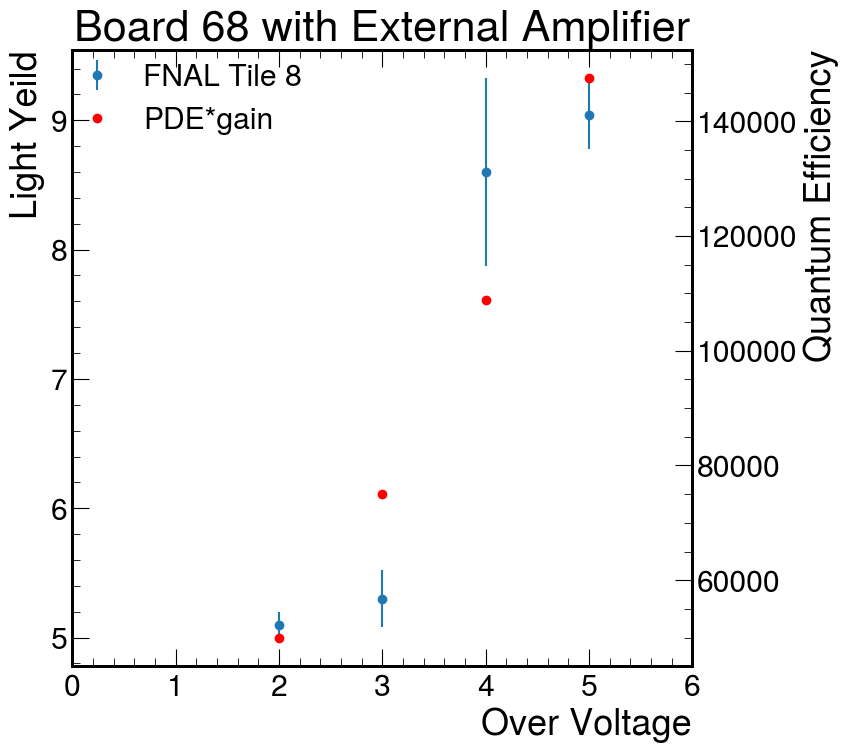

In [22]:
overv = [5,4,3,2]
pe = [9.04,8.6,5.3,5.1]
pe_e = [0.26,0.73,0.22,0.1]
PDE = [.36,.33,.3,.25]
gain = [410000, 330000, 250000, 200000]

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.errorbar(overv,pe,pe_e,fmt='o',label="FNAL Tile 8")
ax1.set_title("Board 68 with External Amplifier")
ax1.set_xlabel("Over Voltage")
ax1.set_ylabel("Light Yeild")
ax2.errorbar(overv,np.array(PDE)*np.array(gain),fmt='o',color='r',label="PDE*gain")
ax2.set_ylabel("Quantum Efficiency")
ax1.set_xlim(0,6)
fig.legend(bbox_to_anchor=(.45, .9))
plt.show()

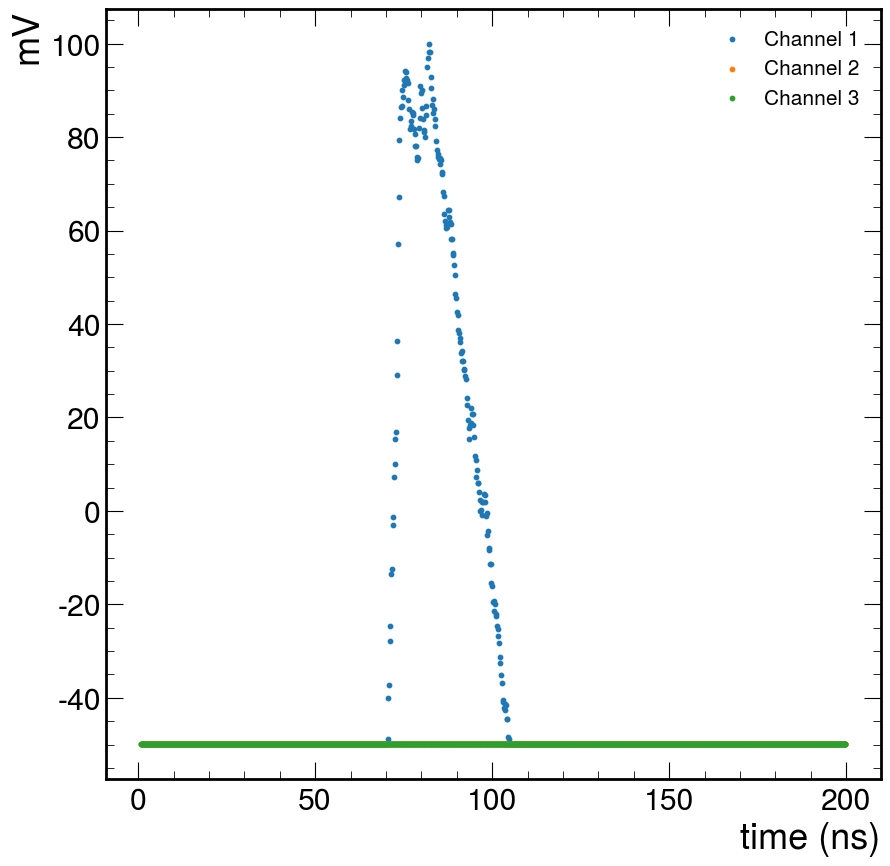

In [38]:
import mplhep as hep
import matplotlib.pyplot as plt

hep.style.use(hep.style.CMS)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

with open("1.txt") as f:
    events = f.read().split('-- Event')
    
lines = events[26].split('\n')#<------------------------------Change events here
time=[]
voltage1=[]
voltage2=[]
voltage3=[]
voltage4=[]

for line in lines[8:1028]:

    values=line.split()
    time.append(float(values[2]))
    voltage1.append(float(values[3]))
    voltage2.append(float(values[4]))
    voltage3.append(float(values[5]))
    voltage4.append(float(values[6]))
    
p0=[0,60,50,75,260,-0.01]

plt.scatter(time,voltage1,s=10,label="Channel 1")
plt.scatter(time,voltage2,s=10,label="Channel 2")
plt.scatter(time,voltage3,s=10,label="Channel 3")

plt.xlabel('time (ns)')
plt.ylabel('mV')
plt.legend(prop={'size': 15})

plt.show()